In [1]:
#Finding the Best Markets to Advertise In

In [2]:
import pandas as pd
data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)
data.shape

(18175, 136)

In [3]:
data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
import pandas as pd
data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)
data['JobRoleInterest'].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                                                                   11.770595
  Front-End Web Developer                                                                                                                                                                                   6.435927
  Data Scientist                                                                                                                                                                                            2.173913
Back-End Web Developer                                                                                                                                                                                      2.030892
  Mobile Developer                                                                                                                                  

In [10]:
import pandas as pd
data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)
data['JobRoleInterest'].value_counts(normalize = True) * 100

# Split each string in the 'JobRoleInterest' column
interests_no_nulls = data['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

interests_no_nulls

1                                 Full-Stack Web Developer
2          Front-End Web Developer, Back-End Web Develo...
3          Front-End Web Developer, Full-Stack Web Deve...
4        Full-Stack Web Developer, Information Security...
6                                 Full-Stack Web Developer
9        Full-Stack Web Developer,   Quality Assurance ...
11         DevOps / SysAdmin,   Data Scientist, Informa...
13       Back-End Web Developer, Full-Stack Web Develop...
14                                Full-Stack Web Developer
15                                Full-Stack Web Developer
16                                Full-Stack Web Developer
18       Full-Stack Web Developer,   Front-End Web Deve...
19         Front-End Web Developer,   Mobile Developer,...
21                                    Information Security
22                                Full-Stack Web Developer
23                                  Back-End Web Developer
28                                Full-Stack Web Develop

In [4]:
# Frequency table for the var describing the number of options
n_of_options = splitted_interests.apply(lambda x: len(x)) # x is a list of job options
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

In [9]:
# Frequency table
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer') # returns an array of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
freq_table

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


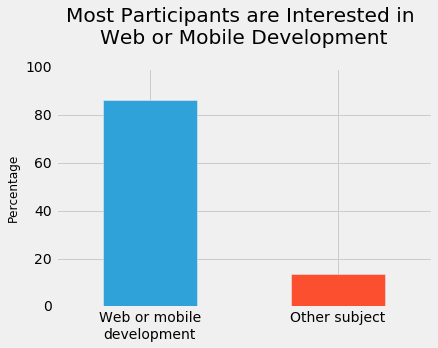

In [8]:
# Graph for the frequency table above
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.ylim([0,100])
plt.show()

In [14]:
import pandas as pd
data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)
data['JobRoleInterest'].value_counts(normalize = True) * 100

# Split each string in the 'JobRoleInterest' column
interests_no_nulls = data['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

# Isolate the participants that answered what role they'd be interested in
data_good = data[data['JobRoleInterest'].notnull()].copy()

# Frequency tables with absolute and relative frequencies
absolute_frequencies = data_good['CountryLive'].value_counts()
relative_frequencies = data_good['CountryLive'].value_counts(normalize = True) * 100

# Display the frequency tables in a more readable format
pd.DataFrame(data = {'Absolute frequency': absolute_frequencies, 
                     'Percentage': relative_frequencies}
            )
absolute_frequencies
relative_frequencies

United States of America         45.700497
India                             7.721556
United Kingdom                    4.606610
Canada                            3.802281
Poland                            1.915765
Brazil                            1.886517
Germany                           1.828020
Australia                         1.637906
Russia                            1.491664
Ukraine                           1.301550
Nigeria                           1.228429
Spain                             1.126060
France                            1.096812
Romania                           1.038315
Netherlands (Holland, Europe)     0.950570
Italy                             0.906698
Serbia                            0.760456
Philippines                       0.760456
Greece                            0.672711
Ireland                           0.628839
South Africa                      0.570342
Mexico                            0.541094
Turkey                            0.526470
Hungary    

In [15]:
# Replace 0s with 1s to avoid division by 0
data_good['MonthsProgramming'].replace(0,1, inplace = True)

# New column for the amount of money each student spends each month
data_good['money_per_month'] = data_good['MoneyForLearning'] / data_good['MonthsProgramming']
data_good['money_per_month'].isnull().sum()

675

In [19]:
# Keep only the rows with non-nulls in the `money_per_month` column 
data_good = data_good[data_good['money_per_month'].notnull()]

In [ ]:
# Remove the rows with null values in 'CountryLive'
data_good = data_good[data_good['CountryLive'].notnull()]

In [20]:
# Frequency table to check if we still have enough data
data_good['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

In [8]:
import pandas as pd
data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)
data['JobRoleInterest'].value_counts(normalize = True) * 100

# Split each string in the 'JobRoleInterest' column
interests_no_nulls = data['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

# Isolate the participants that answered what role they'd be interested in
data_good = data[data['JobRoleInterest'].notnull()].copy()

# Frequency tables with absolute and relative frequencies
absolute_frequencies = data_good['CountryLive'].value_counts()
relative_frequencies = data_good['CountryLive'].value_counts(normalize = True) * 100

# Display the frequency tables in a more readable format
pd.DataFrame(data = {'Absolute frequency': absolute_frequencies, 
                     'Percentage': relative_frequencies}


# New column for the amount of money each student spends each month
data_good['money_per_month'] = data_good['MoneyForLearning'] / data_good['MonthsProgramming']
data_good['money_per_month'].isnull().sum()
data_good = data_good[data_good['money_per_month'].notnull()]
data_good = data_good[data_good['CountryLive'].notnull()]
countries_mean = data_good.groupby['CountryLive'].mean

SyntaxError: invalid syntax (<ipython-input-8-a7749361f260>, line 22)

In [10]:
# Isolate only the countries of interest
only_4 = data_good[data_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

NameError: name 'data_good' is not defined

In [11]:
# Isolate only those participants who spend less than 10000 per month
fcc_good = data_good[data_good['money_per_month'] < 20000]

NameError: name 'data_good' is not defined

In [12]:

# Isolate again the countries of interest
only_4 = data_good[data_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

NameError: name 'data_good' is not defined

In [13]:
# Inspect the extreme outliers for India
india_outliers = only_4[
    (only_4['CountryLive'] == 'India') & 
    (only_4['money_per_month'] >= 2500)]
india_outliers

# Remove the outliers for India
only_4 = only_4.drop(india_outliers.index) # using the row labels

# Examine the extreme outliers for the US
us_outliers = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000)]

us_outliers

NameError: name 'only_4' is not defined

In [14]:

# Remove the respondents who didn't attendent a bootcamp
no_bootcamp = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0)
]

only_4 = only_4.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]

only_4 = only_4.drop(less_than_3_months.index)

NameError: name 'only_4' is not defined

In [15]:

# Examine the extreme outliers for Canada
canada_outliers = only_4[
    (only_4['CountryLive'] == 'Canada') & 
    (only_4['money_per_month'] > 4500)]

canada_outliers

NameError: name 'only_4' is not defined

In [16]:
# Remove the extreme outliers for Canada
only_4 = only_4.drop(canada_outliers.index)
# Recompute mean sum of money spent by students each month
only_4.groupby('CountryLive').mean()['money_per_month']

NameError: name 'only_4' is not defined

In [17]:
# Visualize the distributions again
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

NameError: name 'sns' is not defined

In [18]:

# Frequency table for the 'CountryLive' column
only_4['CountryLive'].value_counts(normalize = True) * 100

NameError: name 'only_4' is not defined